In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
from sklearn.datasets import make_blobs


In [4]:
X,y = make_blobs(n_samples=1000,centers = 3,n_features=2)

In [5]:
X

array([[-5.60895448,  9.05807155],
       [-6.65172824, -4.2891568 ],
       [-1.98378615,  0.54439892],
       ...,
       [-7.82245316, -4.25568329],
       [-1.81248301, -0.48635195],
       [-7.13566417, 10.52412008]])

In [6]:
y

array([1, 0, 2, 2, 0, 0, 1, 0, 0, 2, 2, 1, 2, 1, 0, 0, 1, 1, 2, 0, 0, 2,
       2, 1, 2, 2, 1, 2, 0, 2, 1, 0, 2, 1, 2, 0, 1, 0, 2, 2, 1, 1, 1, 1,
       2, 0, 0, 1, 1, 2, 0, 1, 2, 1, 2, 2, 0, 2, 1, 1, 2, 1, 1, 2, 0, 2,
       0, 1, 2, 2, 0, 0, 1, 1, 2, 0, 0, 2, 2, 0, 2, 2, 1, 0, 2, 0, 1, 1,
       2, 0, 1, 1, 0, 2, 1, 2, 0, 2, 2, 0, 0, 2, 1, 1, 1, 2, 1, 2, 0, 2,
       2, 1, 0, 2, 0, 1, 0, 0, 1, 1, 1, 0, 0, 2, 1, 2, 0, 0, 1, 2, 2, 0,
       2, 2, 2, 1, 0, 0, 0, 0, 1, 2, 2, 0, 1, 2, 1, 2, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 0, 0, 1, 0, 2, 0, 1, 2,
       1, 2, 0, 2, 0, 2, 2, 2, 2, 0, 1, 1, 2, 1, 0, 2, 2, 0, 2, 2, 0, 2,
       2, 1, 0, 1, 2, 1, 1, 2, 0, 2, 2, 1, 2, 2, 0, 2, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 0, 0, 0, 2, 1, 2, 1, 0, 2, 0,
       1, 0, 1, 1, 2, 1, 2, 1, 1, 1, 0, 2, 1, 0, 0, 0, 1, 0, 2, 0, 1, 2,
       1, 1, 2, 0, 2, 2, 2, 0, 0, 1, 1, 2, 0, 0, 0, 1, 0, 0, 2, 2, 0, 2,
       1, 0, 0, 2, 0, 0, 2, 0, 2, 2, 1, 2, 0, 0, 0,

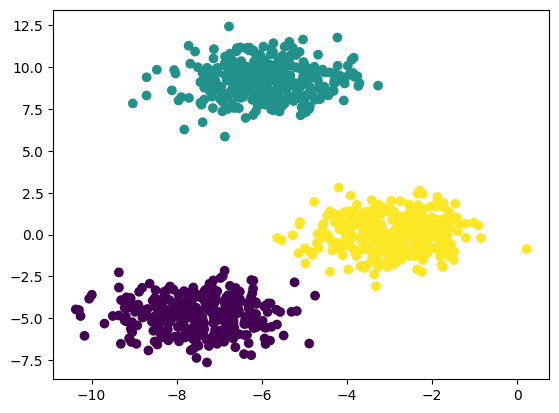

In [7]:
plt.scatter(X[:,0],X[:,1],c=y)

In [8]:
# Standardization - feature scaling technique
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state = 42)

In [10]:
X_train_scalled = scaler.fit_transform(X_train)
X_test_scalled = scaler.transform(X_test)

In [12]:
from sklearn.cluster import KMeans

In [14]:
# Elbow method to select the k value
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters = k,init = "k-means++")
    kmeans.fit(X_train_scalled)
    wcss.append(kmeans.inertia_)

D:\anaconda3\envs\booksenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
D:\anaconda3\envs\booksenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
D:\anaconda3\envs\booksenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
D:\anaconda3\envs\booksenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak o

In [15]:
wcss

[1339.999999999999,
 746.5052599290229,
 163.2770342934371,
 131.94170898745614,
 103.26609521749107,
 97.49856204599577,
 64.17072714966295,
 53.44401850837542,
 49.713511123531646,
 43.04441237744875]

Text(0, 0.5, 'WCSS')

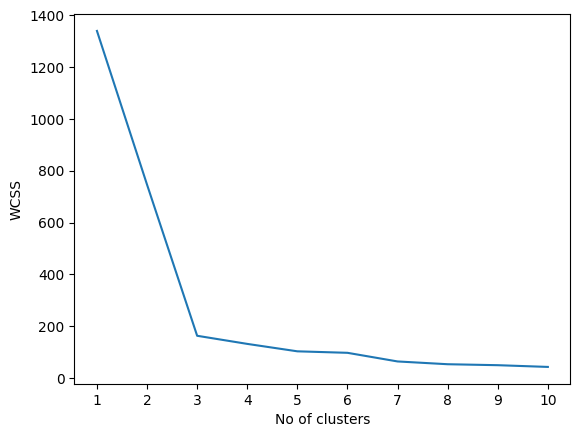

In [16]:
# plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("No of clusters")
plt.ylabel("WCSS")

In [17]:
kmeans = KMeans(n_clusters = 3,init = "k-means++")

In [19]:
kmeans.fit_predict(X_train_scalled)

D:\anaconda3\envs\booksenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


array([1, 1, 1, 2, 1, 1, 2, 0, 1, 2, 2, 2, 2, 2, 1, 0, 2, 2, 1, 2, 2, 1,
       1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 0, 0, 0, 1, 0, 0, 2, 0, 1, 1, 0,
       1, 2, 2, 1, 0, 0, 1, 2, 0, 0, 0, 1, 0, 2, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 2, 2, 0, 2, 1, 0, 0, 2, 1, 1, 2, 1, 2, 1, 2, 0, 1, 1, 0, 1, 0,
       0, 0, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 2, 1, 2, 1, 0, 2, 2, 0, 2, 2,
       1, 2, 1, 2, 2, 2, 2, 1, 2, 0, 2, 1, 0, 2, 2, 1, 1, 0, 1, 2, 2, 2,
       2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 0, 0, 0, 1, 2, 1, 2, 2, 0, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 2, 0, 0, 2, 0, 1, 2, 0, 0, 1, 2, 0, 2, 2, 0,
       1, 2, 2, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 2, 2, 1, 0, 0, 1, 1, 0, 1,
       1, 2, 1, 2, 2, 0, 1, 1, 0, 0, 0, 2, 2, 0, 1, 1, 0, 1, 0, 0, 2, 0,
       0, 1, 2, 2, 1, 0, 0, 2, 0, 1, 2, 1, 0, 1, 2, 1, 2, 2, 2, 1, 1, 1,
       0, 0, 2, 1, 2, 0, 1, 1, 2, 0, 1, 2, 0, 0, 0, 2, 2, 2, 1, 0, 1, 2,
       0, 1, 0, 2, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 1, 2,
       0, 1, 2, 0, 2, 1, 2, 0, 1, 1, 1, 2, 2, 0, 1,

In [20]:
y_pred = kmeans.predict(X_test_scalled)

In [21]:
y_pred

array([0, 2, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 1, 2, 1, 1, 0, 1, 2, 2, 0, 1,
       1, 2, 2, 2, 2, 1, 0, 1, 2, 0, 0, 2, 0, 2, 1, 2, 2, 1, 1, 0, 1, 2,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 1, 1, 1, 2, 0, 1, 1, 2, 0, 1, 0, 2,
       0, 0, 0, 1, 2, 1, 1, 0, 2, 2, 0, 2, 0, 1, 0, 0, 2, 1, 0, 1, 2, 2,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 2, 2, 1, 2, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       2, 0, 0, 2, 1, 2, 2, 1, 0, 2, 2, 0, 2, 2, 2, 1, 2, 1, 0, 2, 0, 2,
       1, 0, 2, 2, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 0, 1, 1, 1, 2, 2, 2, 1,
       0, 0, 1, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 2, 1, 0, 2, 0, 2, 0, 0, 0,
       1, 0, 2, 1, 1, 0, 1, 0, 1, 0, 1, 0, 2, 1, 1, 0, 1, 1, 2, 0, 2, 2,
       0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 1, 1, 0, 1, 1, 0, 2,
       1, 0, 0, 2, 1, 2, 0, 1, 0, 2, 0, 0, 2, 1, 1, 0, 2, 0, 2, 0, 2, 1,
       0, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 0, 0, 0, 1, 2, 2, 2,
       1, 0, 0, 2, 0, 0, 0, 1, 0, 1, 2, 2, 0, 2, 2, 0, 2, 1, 0, 0, 2, 2,
       2, 2, 1, 0, 1, 2, 1, 0, 0, 2, 2, 0, 0, 1, 2,

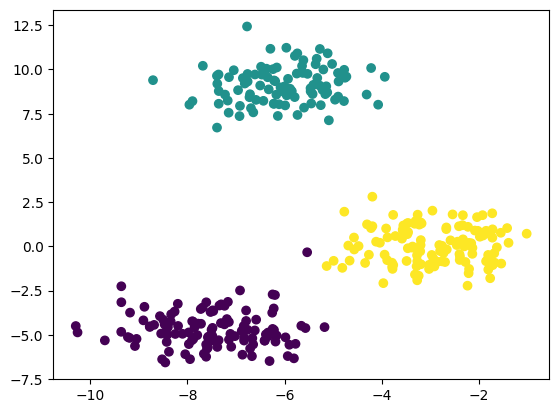

In [22]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)

In [24]:
# validating the k value 
# kneeLoocatoor
# Silhoutee scoring

In [25]:
# kneeLocator
!pip install kneed

In [26]:
from kneed import KneeLocator

In [27]:
kl = KneeLocator(range(1,11),wcss,curve = "convex",direction = "decreasing")

In [28]:
kl.elbow

3

In [29]:
# silhoutee scoring
from sklearn.metrics import silhouette_score

In [30]:
silhouette_coefficients = []
for k in range(2,11):
    kmeans = KMeans(n_clusters = k,init = "k-means++")
    kmeans.fit(X_train_scalled)
    score = silhouette_score(X_train_scalled,kmeans.labels_)
    silhouette_coefficients.append(kmeans.inertia_)

D:\anaconda3\envs\booksenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
D:\anaconda3\envs\booksenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
D:\anaconda3\envs\booksenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
D:\anaconda3\envs\booksenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak o

In [31]:
silhouette_coefficients

[653.165438858867,
 163.2770342934371,
 136.8163694002528,
 98.4204673459484,
 74.02883659227498,
 63.32135397363426,
 56.42990607787182,
 49.72346167265401,
 43.30840334845959]

Text(0, 0.5, 'WCSS')

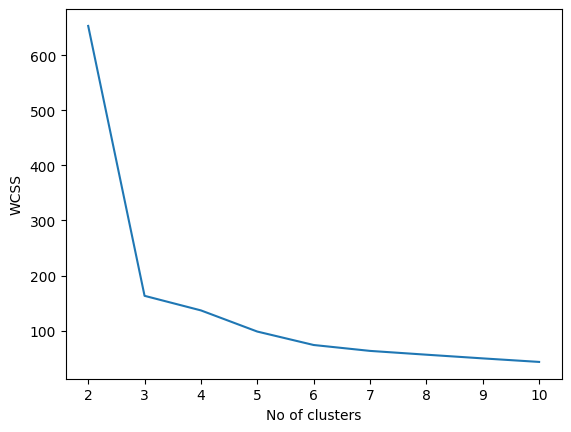

In [32]:
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("No of clusters")
plt.ylabel("Silhoutee")